# Football Players Market Value Analysis 

##### - Guilherme Datt de Campos Pires

## Introduction

##### Portuguese:
Bem vindo ao meu primeiro projeto em Python!

Dataset: "Most Expensive Footballers 2021", disponível no site Kaggle.com 

Fonte: https://www.kaggle.com/datasets/sanjeetsinghnaik/most-expensive-footballers-2021

A análise abaixo foi realizada com o objetivo de entender a relação da métrica "valor de mercado" com as seguintes categorias presentes no dataset:

- Posição
- País
- Idade
- Clube
- Jogadores

Após uma análise geral dessas categorias, criei uma pequena comparação entre os dois jogadores mais valiosos do dataset: Kylian  Mbappé e Erling Haaland.

Espero que gostem!

##### English:

Welcome to my first Python project!

Dataset: "Most Expensive Footballers 2021", available on the website Kaggle.com. 

Source: https://www.kaggle.com/datasets/sanjeetsinghnaik/most-expensive-footballers-2021


The analysis below was conducted to understand the relationship between the market value and the following categories:

- Position
- Country
- Age
- Club
- Players

After that, I compared the two most valuable players of the dataset: Kylian Mbappé and Erling Haaland.

Hope you will enjoy!

## 1. Loading the libraries and reading the csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading csv

data = pd.read_csv("players.csv")

## 2. Exploratory Analysis

In [3]:
data

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Giorgian de Arrascaeta,Attacking Midfield,27,16.2,Uruguay,Clube de Regatas do Flamengo,0,0,0,0,0,0,0,0,0
496,496,Ayoze Pérez,Second Striker,28,16.2,Spain,Leicester City,8,1,0,3,0,0,1,2,5
497,497,Alex Meret,Goalkeeper,24,16.2,Italy,SSC Napoli,5,0,0,0,0,0,0,0,0
498,498,Duje Caleta-Car,Centre-Back,25,16.2,Croatia,Olympique Marseille,8,0,0,0,2,0,0,0,2


In [4]:
display(data.head())
display(data.tail())

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3


,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
495,495,Giorgian de Arrascaeta,Attacking Midfield,27,16.2,Uruguay,Clube de Regatas do Flamengo,0,0,0,0,0,0,0,0,0
496,496,Ayoze Pérez,Second Striker,28,16.2,Spain,Leicester City,8,1,0,3,0,0,1,2,5
497,497,Alex Meret,Goalkeeper,24,16.2,Italy,SSC Napoli,5,0,0,0,0,0,0,0,0
498,498,Duje Caleta-Car,Centre-Back,25,16.2,Croatia,Olympique Marseille,8,0,0,0,2,0,0,0,2
499,499,Aritz Elustondo,Centre-Back,27,16.2,Spain,Real Sociedad,15,3,0,1,4,0,0,1,1


In [5]:
# renaming columns

data = data.rename(columns=
            {'Markey Value In Millions(£)': 'Market_value','Own Goals': 'Own_goals', 
             'Yellow Cards': 'Yellow_cards','Second Yellow Cards': 'Second_yellow_cards', 
             'Red Cards': 'Red_cards', 'Number Of Substitute In': 'Substitute_in',
             'Number Of Substitute Out': 'Substitute_out'})

In [6]:
# dropping the Unnamed: 0 column

data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [7]:
data.columns

Index(['Name', 'Position', 'Age', 'Market_value', 'Country', 'Club', 'Matches',
       'Goals', 'Own_goals', 'Assists', 'Yellow_cards', 'Second_yellow_cards',
       'Red_cards', 'Substitute_in', 'Substitute_out'],
      dtype='object')

In [8]:
data.index

RangeIndex(start=0, stop=500, step=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 500 non-null    object 
 1   Position             500 non-null    object 
 2   Age                  500 non-null    int64  
 3   Market_value         500 non-null    float64
 4   Country              500 non-null    object 
 5   Club                 500 non-null    object 
 6   Matches              500 non-null    int64  
 7   Goals                500 non-null    int64  
 8   Own_goals            500 non-null    int64  
 9   Assists              500 non-null    int64  
 10  Yellow_cards         500 non-null    int64  
 11  Second_yellow_cards  500 non-null    int64  
 12  Red_cards            500 non-null    int64  
 13  Substitute_in        500 non-null    int64  
 14  Substitute_out       500 non-null    int64  
dtypes: float64(1), int64(10), object(4)
memo

In [10]:
data.dtypes

Name                    object
Position                object
Age                      int64
Market_value           float64
Country                 object
Club                    object
Matches                  int64
Goals                    int64
Own_goals                int64
Assists                  int64
Yellow_cards             int64
Second_yellow_cards      int64
Red_cards                int64
Substitute_in            int64
Substitute_out           int64
dtype: object

In [11]:
print("We have %0.f rows and %0.f columns"%(data.shape[0],data.shape[1]))

We have 500 rows and 15 columns


In [12]:
data.describe()

,Age,Market_value,Matches,Goals,Own_goals,Assists,Yellow_cards,Second_yellow_cards,Red_cards,Substitute_in,Substitute_out
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,24.968000,31.537800,12.396000,2.160000,0.030000,1.51200,1.592000,0.036000,0.046000,2.394000,3.744000
std,3.165916,17.577697,4.342453,2.880102,0.170758,1.85276,1.445585,0.186477,0.209695,2.517825,3.293046
min,16.000000,16.200000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,19.800000,10.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,25.000000,25.200000,13.000000,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,2.000000,3.000000
75%,27.000000,36.000000,16.000000,3.000000,0.000000,2.00000,2.000000,0.000000,0.000000,3.250000,6.000000
max,36.000000,144.000000,24.000000,23.000000,1.000000,12.00000,7.000000,1.000000,1.000000,13.000000,20.000000


In [13]:
data.isnull()

,Name,Position,Age,Market_value,Country,Club,Matches,Goals,Own_goals,Assists,Yellow_cards,Second_yellow_cards,Red_cards,Substitute_in,Substitute_out
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
data.isna().sum()

# the dataset doesn´t have missing values

Name                   0
Position               0
Age                    0
Market_value           0
Country                0
Club                   0
Matches                0
Goals                  0
Own_goals              0
Assists                0
Yellow_cards           0
Second_yellow_cards    0
Red_cards              0
Substitute_in          0
Substitute_out         0
dtype: int64

In [15]:
data['Club'].unique()

array(['Paris Saint-Germain', 'Borussia Dortmund', 'Tottenham Hotspur',
       'Manchester City', 'Liverpool FC', 'Chelsea FC',
       'Manchester United', 'FC Barcelona', 'Bayern Munich',
       'Inter Milan', 'Atlético de Madrid', 'West Ham United',
       'Real Sociedad', 'Juventus FC', 'SS Lazio', 'Real Madrid',
       'Bayer 04 Leverkusen', 'Arsenal FC', 'Sevilla FC', 'SSC Napoli',
       'Leicester City', 'Everton FC', 'AC Milan', 'Villarreal CF',
       'ACF Fiorentina', 'RB Leipzig', 'AS Roma', 'Crystal Palace',
       'Wolverhampton Wanderers', 'Valencia CF', 'Leeds United',
       'LOSC Lille', 'Aston Villa', 'Olympique Lyon', 'OGC Nice',
       'AS Monaco', 'Atalanta BC', 'US Sassuolo', 'Torino FC',
       'Ajax Amsterdam', 'Brentford FC', 'Southampton FC',
       'Newcastle United', 'VfL Wolfsburg', 'FC Porto',
       'Olympique Marseille', 'Eintracht Frankfurt',
       'Borussia Mönchengladbach', 'Watford FC', 'Stade Rennais FC',
       'Clube de Regatas do Flamengo', 'VfB

In [16]:
data.Club.nunique()

81

In [17]:
data.Country.unique()

array(['France', 'Norway', 'England', 'Egypt', 'Belgium', 'Brazil',
       'Netherlands', 'Portugal', 'Germany', 'Senegal', 'Korea, South',
       'Spain', 'Argentina', 'Canada', 'Morocco', 'Italy', 'Serbia',
       'Slovenia', 'Uruguay', 'Scotland', 'Nigeria', 'Slovakia', 'Poland',
       "Cote d'Ivoire", 'Austria', 'United States', 'Turkey', 'Mexico',
       'Croatia', 'Czech Republic', 'Algeria', 'Burkina Faso', 'Sweden',
       'Ghana', 'Denmark', 'Jamaica', 'Colombia', 'Guinea', 'Switzerland',
       'Ukraine', 'Russia', 'DR Congo', 'Hungary', 'Mali', 'Japan',
       'Cameroon', 'Iran', 'Montenegro', 'Gabon', 'Albania', 'Zambia',
       'The Gambia', 'Israel', 'Georgia', 'Venezuela', 'Wales', 'Peru'],
      dtype=object)

In [18]:
data.Country.nunique()

57

In [19]:
data.Position.unique()

array(['Centre-Forward', 'Left Winger', 'Right Winger',
       'Attacking Midfield', 'Central Midfield', 'Defensive Midfield',
       'Right-Back', 'Centre-Back', 'Second Striker', 'Left-Back',
       'Goalkeeper', 'Left Midfield', 'Right Midfield'], dtype=object)

In [20]:
data.Position.nunique()

13

In [21]:
# Creating new categories for Position using np.where

data['New_Position'] = np.where((data['Position'] == 'Centre-Forward') | 
                                (data['Position'] == 'Left Winger') | 
                                (data['Position'] == 'Right Winger')|
                                (data['Position'] == 'Second Striker'),'Attacker',
                                np.where((data['Position'] == 'Attacking Midfield') | 
                                         (data['Position'] == 'Central Midfield') | 
                                         (data['Position'] == 'Defensive Midfield') | 
                                         (data['Position'] == 'Left Midfield') | 
                                         (data['Position'] == 'Right Midfield'), 'Midfielder',
                                         np.where(data['Position'] == 'Goalkeeper', 
                                                  'Goalkeeper','Defender')))

data

,Name,Position,Age,Market_value,Country,Club,Matches,Goals,Own_goals,Assists,Yellow_cards,Second_yellow_cards,Red_cards,Substitute_in,Substitute_out,New_Position
0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8,Attacker
1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1,Attacker
2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2,Attacker
3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8,Attacker
4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3,Attacker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Giorgian de Arrascaeta,Attacking Midfield,27,16.2,Uruguay,Clube de Regatas do Flamengo,0,0,0,0,0,0,0,0,0,Midfielder
496,Ayoze Pérez,Second Striker,28,16.2,Spain,Leicester City,8,1,0,3,0,0,1,2,5,Attacker
497,Alex Meret,Goalkeeper,24,16.2,Italy,SSC Napoli,5,0,0,0,0,0,0,0,0,Goalkeeper
498,Duje Caleta-Car,Centre-Back,25,16.2,Croatia,Olympique Marseille,8,0,0,0,2,0,0,0,2,Defender


In [22]:
# converting Market_value from float to int

data['Market_value'] = data['Market_value'].astype(int)
data.Market_value.dtype

dtype('int32')

In [23]:
data

,Name,Position,Age,Market_value,Country,Club,Matches,Goals,Own_goals,Assists,Yellow_cards,Second_yellow_cards,Red_cards,Substitute_in,Substitute_out,New_Position
0,Kylian Mbappé,Centre-Forward,22,144,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8,Attacker
1,Erling Haaland,Centre-Forward,21,135,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1,Attacker
2,Harry Kane,Centre-Forward,28,108,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2,Attacker
3,Jack Grealish,Left Winger,26,90,England,Manchester City,15,2,0,3,1,0,0,2,8,Attacker
4,Mohamed Salah,Right Winger,29,90,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3,Attacker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Giorgian de Arrascaeta,Attacking Midfield,27,16,Uruguay,Clube de Regatas do Flamengo,0,0,0,0,0,0,0,0,0,Midfielder
496,Ayoze Pérez,Second Striker,28,16,Spain,Leicester City,8,1,0,3,0,0,1,2,5,Attacker
497,Alex Meret,Goalkeeper,24,16,Italy,SSC Napoli,5,0,0,0,0,0,0,0,0,Goalkeeper
498,Duje Caleta-Car,Centre-Back,25,16,Croatia,Olympique Marseille,8,0,0,0,2,0,0,0,2,Defender


In [24]:
# creating new columns

data['Goals.per.game'] =  (data['Goals']/data['Matches']).round(2)
data['Assists.per.game'] =  (data['Assists']/data['Matches']).round(2)
data

,Name,Position,Age,Market_value,Country,Club,Matches,Goals,Own_goals,Assists,Yellow_cards,Second_yellow_cards,Red_cards,Substitute_in,Substitute_out,New_Position,Goals.per.game,Assists.per.game
0,Kylian Mbappé,Centre-Forward,22,144,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8,Attacker,0.44,0.69
1,Erling Haaland,Centre-Forward,21,135,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1,Attacker,1.30,0.40
2,Harry Kane,Centre-Forward,28,108,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2,Attacker,0.44,0.12
3,Jack Grealish,Left Winger,26,90,England,Manchester City,15,2,0,3,1,0,0,2,8,Attacker,0.13,0.20
4,Mohamed Salah,Right Winger,29,90,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3,Attacker,1.00,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Giorgian de Arrascaeta,Attacking Midfield,27,16,Uruguay,Clube de Regatas do Flamengo,0,0,0,0,0,0,0,0,0,Midfielder,NaN,NaN
496,Ayoze Pérez,Second Striker,28,16,Spain,Leicester City,8,1,0,3,0,0,1,2,5,Attacker,0.12,0.38
497,Alex Meret,Goalkeeper,24,16,Italy,SSC Napoli,5,0,0,0,0,0,0,0,0,Goalkeeper,0.00,0.00
498,Duje Caleta-Car,Centre-Back,25,16,Croatia,Olympique Marseille,8,0,0,0,2,0,0,0,2,Defender,0.00,0.00


# 3. Market Value x Categories 

## 3.1 Position

In [25]:
data

,Name,Position,Age,Market_value,Country,Club,Matches,Goals,Own_goals,Assists,Yellow_cards,Second_yellow_cards,Red_cards,Substitute_in,Substitute_out,New_Position,Goals.per.game,Assists.per.game
0,Kylian Mbappé,Centre-Forward,22,144,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8,Attacker,0.44,0.69
1,Erling Haaland,Centre-Forward,21,135,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1,Attacker,1.30,0.40
2,Harry Kane,Centre-Forward,28,108,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2,Attacker,0.44,0.12
3,Jack Grealish,Left Winger,26,90,England,Manchester City,15,2,0,3,1,0,0,2,8,Attacker,0.13,0.20
4,Mohamed Salah,Right Winger,29,90,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3,Attacker,1.00,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Giorgian de Arrascaeta,Attacking Midfield,27,16,Uruguay,Clube de Regatas do Flamengo,0,0,0,0,0,0,0,0,0,Midfielder,NaN,NaN
496,Ayoze Pérez,Second Striker,28,16,Spain,Leicester City,8,1,0,3,0,0,1,2,5,Attacker,0.12,0.38
497,Alex Meret,Goalkeeper,24,16,Italy,SSC Napoli,5,0,0,0,0,0,0,0,0,Goalkeeper,0.00,0.00
498,Duje Caleta-Car,Centre-Back,25,16,Croatia,Olympique Marseille,8,0,0,0,2,0,0,0,2,Defender,0.00,0.00


In [26]:
data.New_Position.value_counts()

Attacker      172
Midfielder    169
Defender      140
Goalkeeper     19
Name: New_Position, dtype: int64

Text(0.5, 1.0, 'Count of positions')

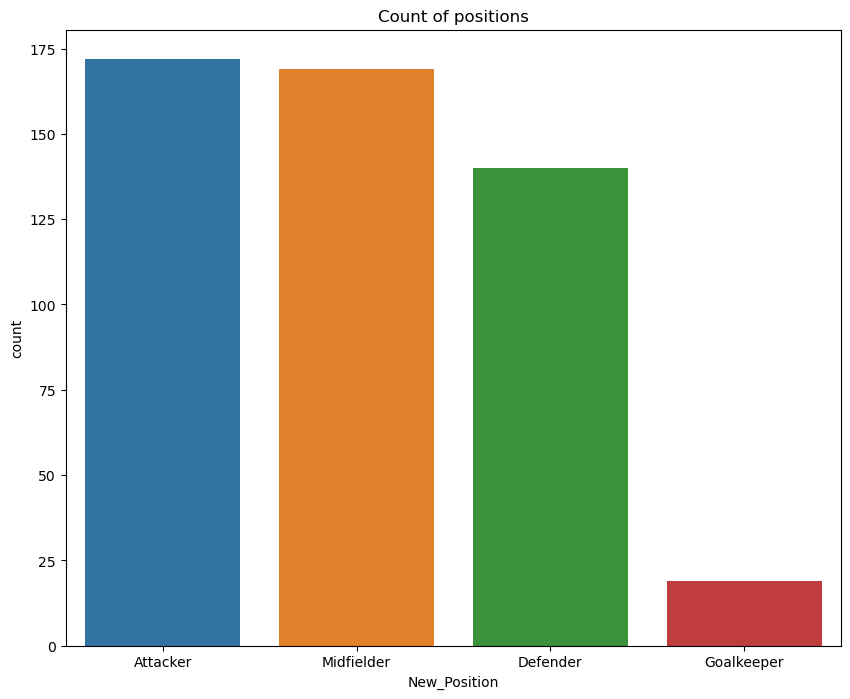

In [27]:
plt.figure(figsize=(10,8))

sns.countplot(data=data, x='New_Position')

plt.title("Count of positions")

In [28]:
x = data.groupby('New_Position').Market_value.sum().sort_values(ascending=False).head(10)
x

New_Position
Attacker      5706
Midfielder    5306
Defender      4031
Goalkeeper     582
Name: Market_value, dtype: int32

<Axes: title={'center': 'Sum of Market Value x Position'}, xlabel='New_Position', ylabel='Market_value'>

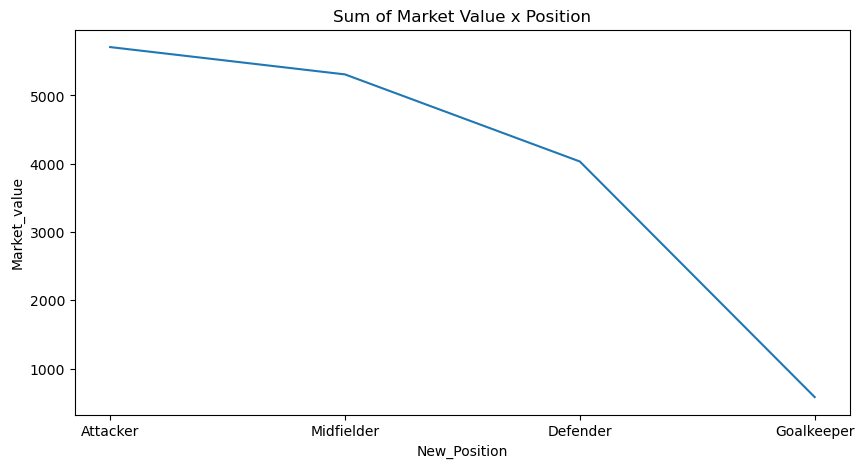

In [29]:
# visualizing

plt.figure(figsize=(10,5))

plt.title("Sum of Market Value x Position")

sns.lineplot(data=x)

In [30]:
y = data.groupby('New_Position').Market_value.mean().sort_values(ascending=False).head(10)
y

New_Position
Attacker      33.174419
Midfielder    31.396450
Goalkeeper    30.631579
Defender      28.792857
Name: Market_value, dtype: float64

<Axes: title={'center': 'Average of Market Value x Position'}, xlabel='New_Position', ylabel='Market_value'>

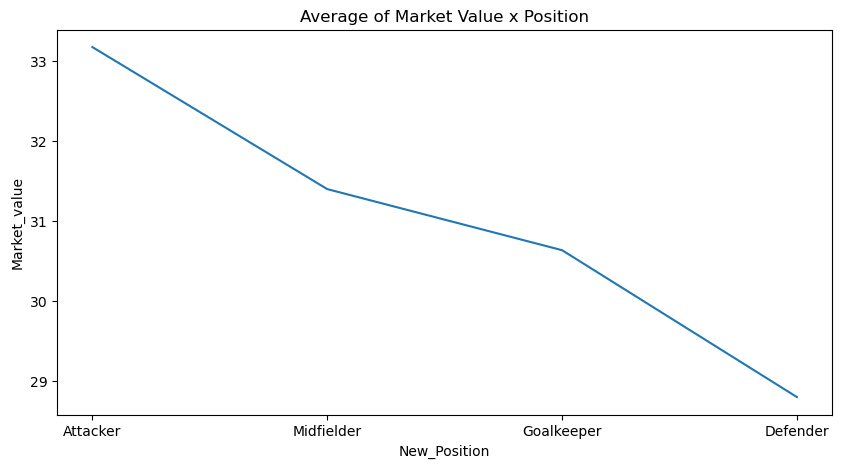

In [31]:
# visualizing

plt.figure(figsize=(10,5))

plt.title("Average of Market Value x Position")

sns.lineplot(data=y)

In [32]:
# which are the specific positions of the field that are most valued?

data.Position.value_counts()

Centre-Back           87
Central Midfield      74
Centre-Forward        70
Right Winger          48
Left Winger           46
Attacking Midfield    41
Defensive Midfield    41
Right-Back            30
Left-Back             23
Goalkeeper            19
Second Striker         8
Left Midfield          8
Right Midfield         5
Name: Position, dtype: int64

In [33]:
c=data.groupby('Position').Market_value.sum().sort_values(ascending = False)
c

Position
Centre-Back           2557
Central Midfield      2401
Centre-Forward        2348
Left Winger           1632
Right Winger          1447
Attacking Midfield    1324
Defensive Midfield    1263
Right-Back             777
Left-Back              697
Goalkeeper             582
Second Striker         279
Left Midfield          213
Right Midfield         105
Name: Market_value, dtype: int32

In [34]:
data.groupby('Position').Market_value.agg(['max', 'min']).sort_values(by=['max', 'min'], ascending = False).head(10)

,max,min
Position,,
Centre-Forward,144,16
Attacking Midfield,90,16
Left Winger,90,16
Right Winger,90,16
Central Midfield,81,16
Defensive Midfield,81,16
Centre-Back,67,16
Right-Back,67,16
Goalkeeper,63,16


<Axes: title={'center': 'Sum of Market Value x Position'}, xlabel='Position', ylabel='Market_value'>

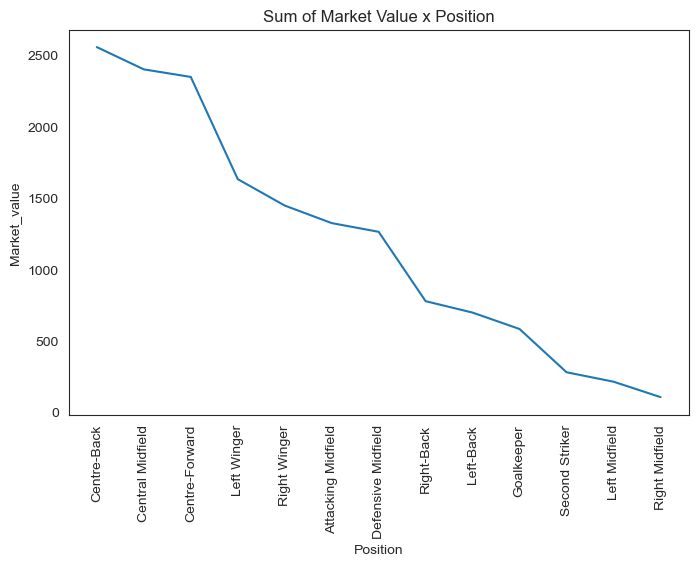

In [70]:
# visualizing

plt.figure(figsize=(8,5))

plt.title("Sum of Market Value x Position")

plt.xticks(rotation=90)

sns.lineplot(data=c)

In [36]:
data.groupby("Position").Market_value.mean().sort_values(ascending=False)

Position
Left Winger           35.478261
Second Striker        34.875000
Centre-Forward        33.542857
Central Midfield      32.445946
Attacking Midfield    32.292683
Defensive Midfield    30.804878
Goalkeeper            30.631579
Left-Back             30.304348
Right Winger          30.145833
Centre-Back           29.390805
Left Midfield         26.625000
Right-Back            25.900000
Right Midfield        21.000000
Name: Market_value, dtype: float64

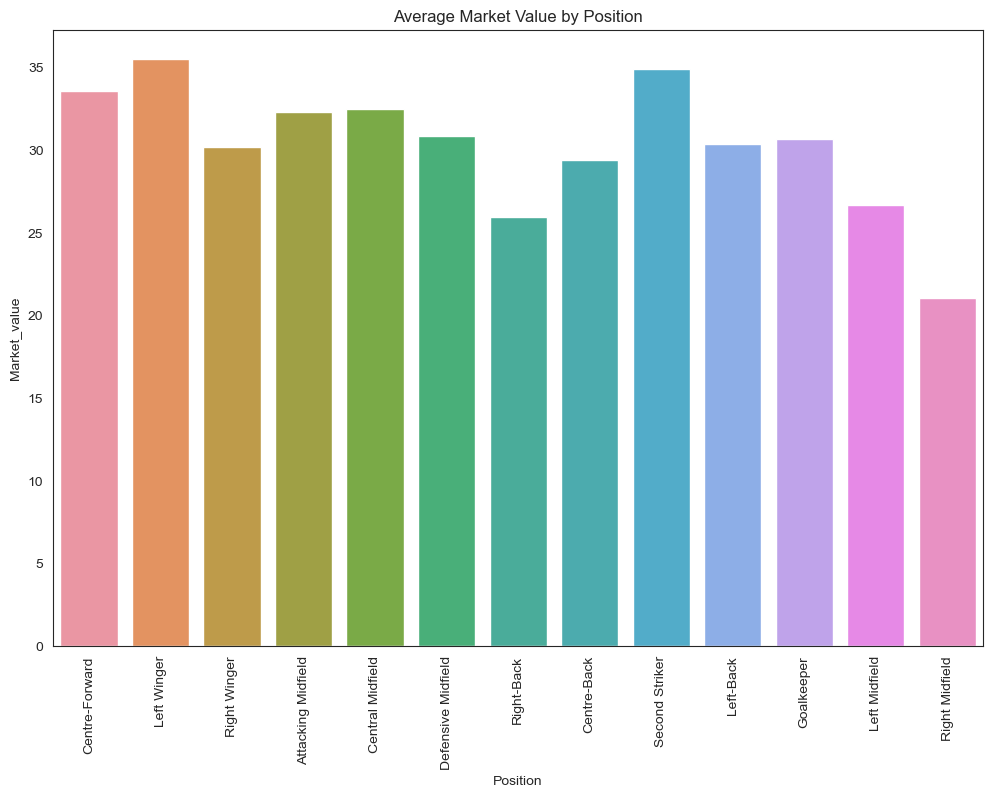

In [72]:
plt.figure(figsize=(12, 8))
sns.barplot(data=data, x='Position', y='Market_value',errorbar=None)
plt.title('Average Market Value by Position')
sns.set_style("white")
plt.xticks(rotation=90)
plt.show()

#### Insights

##### Portuguese

- Analisando pelas posições gerais, notamos que o dataset tem maior número de atacantes, seguido de meiocampistas e defensores. Os goleiros aparecem em menor quantidade.

- Notamos também que os atacantes são mais valorizados, seguidos dos meias e os defensores. Os goleiros tem uma soma de valor de mercado bem inferior. Porém, quando observamos a média, os defensores ficam abaixo dos goleiros.

- Analisando as posições específicas (que estão dentro de atacantes, meiocampistas e defensores), notamos que temos um grande número de zagueiros, meiocampistas centrais e centroavantes no dataset. Por conta da maior quantidade, essas posições também apresentaram a maior soma de valor de mercado. 

- Porém, quando observamos a média, pontas-esquerdos, segundos-atacantes e centroavantes possuem o maior índice.




##### English

- Analyzing by general positions, we notice that the dataset has a higher number of forwards, followed by midfielders and defenders. The goalkeepers appear in a smaller quantity.

- We can also observe that forwards are more valued, followed by midfielders and defenders. Goalkeepers have a significantly lower total market value. However, when we look at the average, defenders are below goalkeepers.

- Analyzing specific positions within forwards, midfielders, and defenders, we notice that we have a large number of center-backs, central midfielders, and center-forwards in the dataset. Due to the higher quantity, these positions also have the highest sum of market value.

- However, when we consider the average, left-wingers, second strikers, and center-forwards have the highest value index.

## 3.2 Country

In [38]:
data.Country.value_counts().head(10)

England        67
France         58
Spain          52
Brazil         41
Germany        29
Portugal       26
Italy          26
Argentina      22
Netherlands    17
Belgium        14
Name: Country, dtype: int64

In [39]:
data.groupby('Country').Market_value.sum().sort_values(ascending=False).head(10)

Country
England        2227
France         1878
Spain          1556
Brazil         1263
Germany         999
Portugal        881
Italy           847
Argentina       645
Netherlands     565
Belgium         519
Name: Market_value, dtype: int32

In [40]:
data.groupby('Country').Market_value.agg(['max', 'min']).sort_values(by=['max', 'min'], ascending = False).head(10)

,max,min
Country,,
France,144,16
Norway,135,16
England,108,16
Egypt,90,90
Belgium,90,16
Brazil,90,16
Netherlands,81,19
Germany,81,16
Portugal,81,16


In [41]:
data.groupby('Country').Market_value.mean().sort_values(ascending = False).head(10)

Country
Egypt           90.000000
Korea, South    76.000000
Slovenia        63.000000
Norway          62.333333
Slovakia        54.000000
Canada          47.000000
Morocco         37.250000
Belgium         37.071429
Ghana           36.000000
Senegal         35.000000
Name: Market_value, dtype: float64

In [42]:
selected_countries = ['Slovenia', 'Norway', 'Slovakia', 'Canada', 'Marocco', 'Belgium', 'Ghana', 'Senegal']
counts = data[data['Country'].isin(selected_countries)]['Country'].value_counts()
counts

Belgium     14
Senegal      6
Norway       3
Canada       2
Slovenia     1
Slovakia     1
Ghana        1
Name: Country, dtype: int64

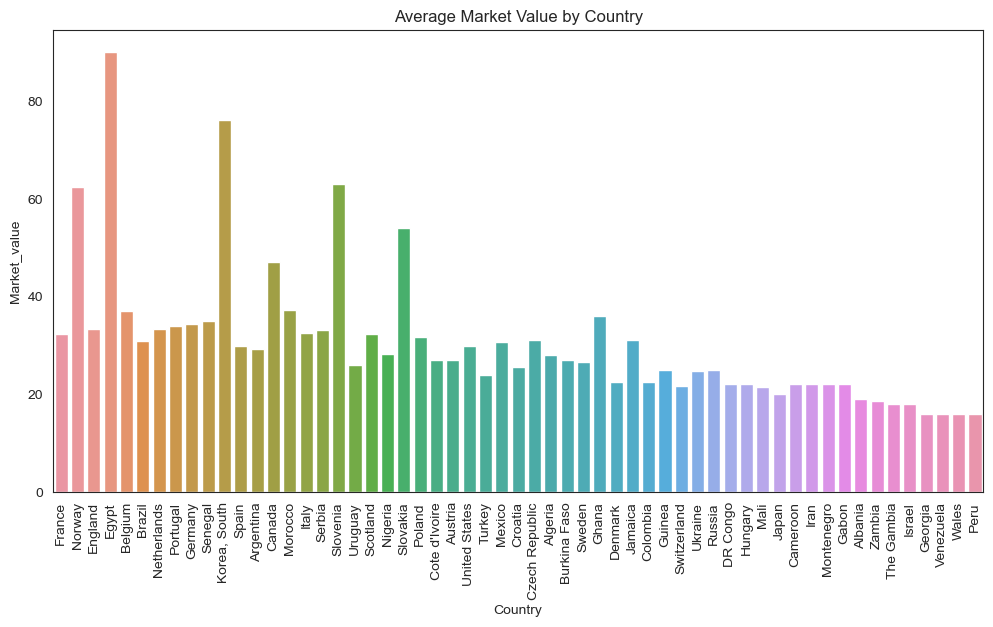

In [78]:
# visualizing

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Country', y='Market_value',errorbar=None)
plt.title('Average Market Value by Country')
plt.xticks(rotation=90)
plt.show()

## Insights

##### Portuguese

- Inglaterra tem o maior número de jogadores no dataset, seguido de França, Espanha, Brasil e Alemanha. Esses mesmos cinco países tem as maiores somas de valor de mercado, por conta de possuirem mais jogadores na lista.

- França e Noruega possuem o maior valor máximo, por conta de terem os dois jogadores mais valorizados. O Egito possui o mesmo valor de máximo e minimo, além do maior valor médio. Isso se da pelo país ter apenas um jogador na lista (Salah). 

- Outro países apresentaram média elevada por conta de terem poucos jogadores na base de dados, como a Coréia do Sul, Noruega, Slovakia e Slovenia.



##### English

- England has the highest number of players in the dataset, followed by France, Spain, Brazil, and Germany. These same five countries have the highest total market values due to having more players on the list.

- France and Norway have the highest maximum value, as they have the two most valued players. Egypt has the same maximum and minimum value, along with the highest average value, because the country has only one player in the list (Salah). 

- Other countries have higher averages because they have few players in the database, such as South Korea, Norway, Slovakia, and Slovenia.

## 3.3 Age

In [44]:
data.Age.value_counts()

24    83
25    53
26    51
23    46
27    42
28    42
21    37
22    36
29    35
30    24
20    15
19    13
31     8
18     6
33     3
32     2
34     1
36     1
17     1
16     1
Name: Age, dtype: int64

<Axes: title={'center': 'Count of ages'}, xlabel='Age', ylabel='count'>

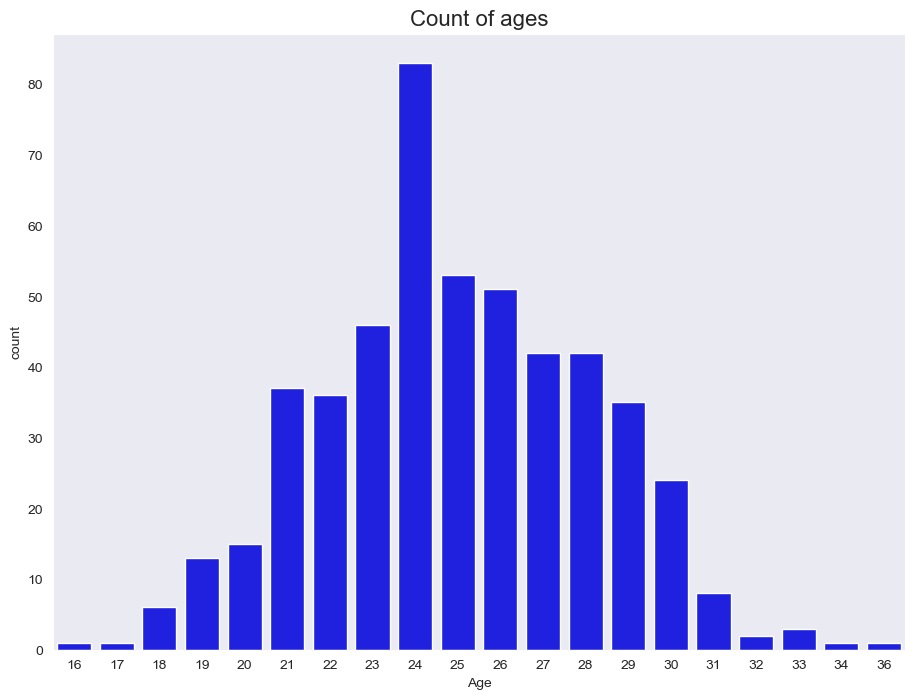

In [45]:
plt.figure(figsize=(11,8))

sns.set_style("dark")

plt.title("Count of ages", fontsize=16)

plt.xlabel=("Age")

sns.countplot(data=data, x="Age", color='blue')

C:\Users\guilh\AppData\Local\Temp\ipykernel_12256\1149527092.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'], hist=True, color='Blue')


Text(0.5, 1.0, 'Density Plot of the Ages')

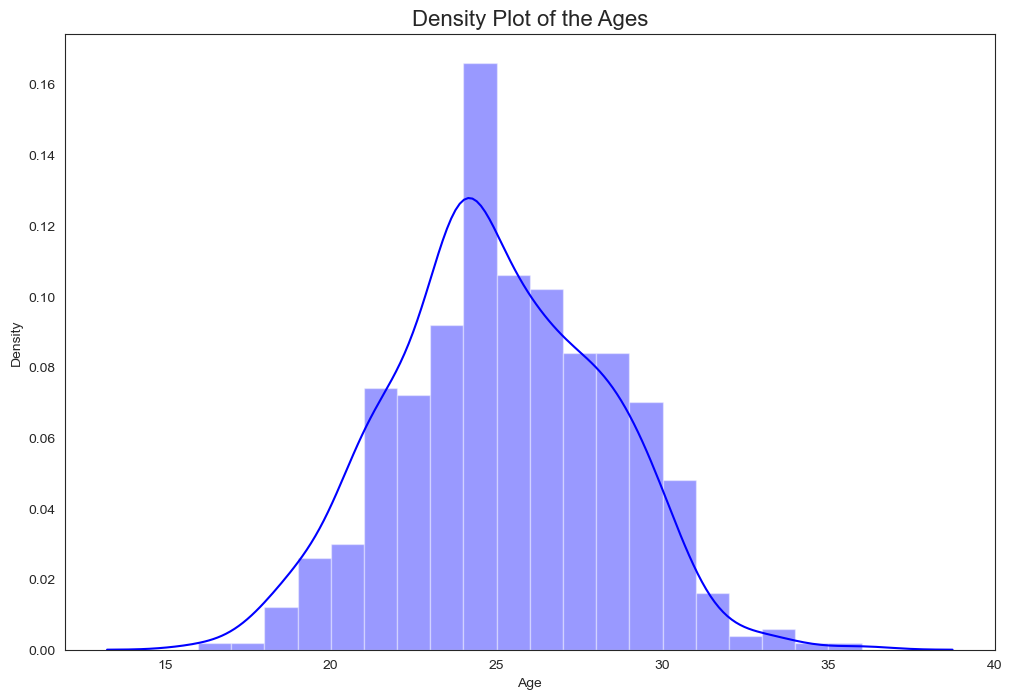

In [79]:
plt.figure(figsize=(12, 8))
sns.distplot(data['Age'], hist=True, color='Blue')
plt.title("Density Plot of the Ages", fontsize=16)

In [47]:
# age x market value sum

data.groupby('Age').Market_value.sum().sort_values(ascending=False).head(10)

Age
24    2526
26    1694
25    1409
28    1380
29    1350
22    1275
23    1271
27    1261
21    1185
30     729
Name: Market_value, dtype: int32

In [48]:
# age x market value average

data.groupby('Age').Market_value.mean().sort_values(ascending=False).head(10)

Age
34    72.000000
18    46.666667
36    40.000000
29    38.571429
22    35.416667
26    33.215686
28    32.857143
21    32.027027
33    31.333333
24    30.433735
Name: Market_value, dtype: float64

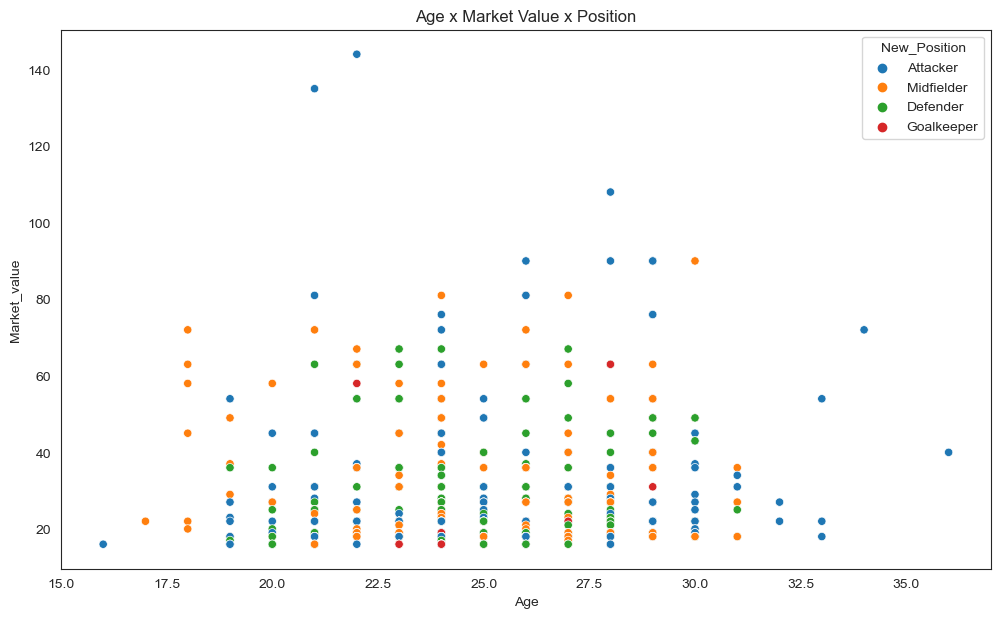

In [80]:
plt.figure(figsize=(12,7))

plt.title("Age x Market Value x Position")

sns.scatterplot(data=data, x='Age', y='Market_value', hue='New_Position')

sns.set_style("darkgrid")

#### Insights

##### Portuguese

- A maior parte dos jogadores do dataset estão na faixa dos 20 até 30 anos. 

- Temos uma maior quantidade de jogadores com 24 anos(83 jogadores), seguido dos 25 anos (53 jogadores) e 26 anos (51 jogadores). Por conta da maior volumetria de jogadores com essas idades, elas concentraram maior soma de valor de mercado. 










##### English

- Most of the players in the dataset are in the age range of 20 to 30 years.

- We have a higher number of players aged 24 (83 players), followed by 25 years (53 players), and 26 years (51 players). Due to the larger number of players in these age groups, they have accumulated a higher total market value. 



### 3.4 Clubs

In [50]:
data.Club.unique()

array(['Paris Saint-Germain', 'Borussia Dortmund', 'Tottenham Hotspur',
       'Manchester City', 'Liverpool FC', 'Chelsea FC',
       'Manchester United', 'FC Barcelona', 'Bayern Munich',
       'Inter Milan', 'Atlético de Madrid', 'West Ham United',
       'Real Sociedad', 'Juventus FC', 'SS Lazio', 'Real Madrid',
       'Bayer 04 Leverkusen', 'Arsenal FC', 'Sevilla FC', 'SSC Napoli',
       'Leicester City', 'Everton FC', 'AC Milan', 'Villarreal CF',
       'ACF Fiorentina', 'RB Leipzig', 'AS Roma', 'Crystal Palace',
       'Wolverhampton Wanderers', 'Valencia CF', 'Leeds United',
       'LOSC Lille', 'Aston Villa', 'Olympique Lyon', 'OGC Nice',
       'AS Monaco', 'Atalanta BC', 'US Sassuolo', 'Torino FC',
       'Ajax Amsterdam', 'Brentford FC', 'Southampton FC',
       'Newcastle United', 'VfL Wolfsburg', 'FC Porto',
       'Olympique Marseille', 'Eintracht Frankfurt',
       'Borussia Mönchengladbach', 'Watford FC', 'Stade Rennais FC',
       'Clube de Regatas do Flamengo', 'VfB

In [51]:
top_20_clubs = data.Club.value_counts().head(20)
top_20_clubs

Manchester United          19
Manchester City            18
Paris Saint-Germain        16
Tottenham Hotspur          16
Chelsea FC                 16
Real Madrid                16
Liverpool FC               15
RB Leipzig                 15
Atlético de Madrid         15
Arsenal FC                 15
Bayern Munich              14
Juventus FC                13
AC Milan                   13
Everton FC                 13
Atalanta BC                12
Leicester City             12
Wolverhampton Wanderers    11
Borussia Dortmund          11
Aston Villa                11
FC Barcelona               11
Name: Club, dtype: int64

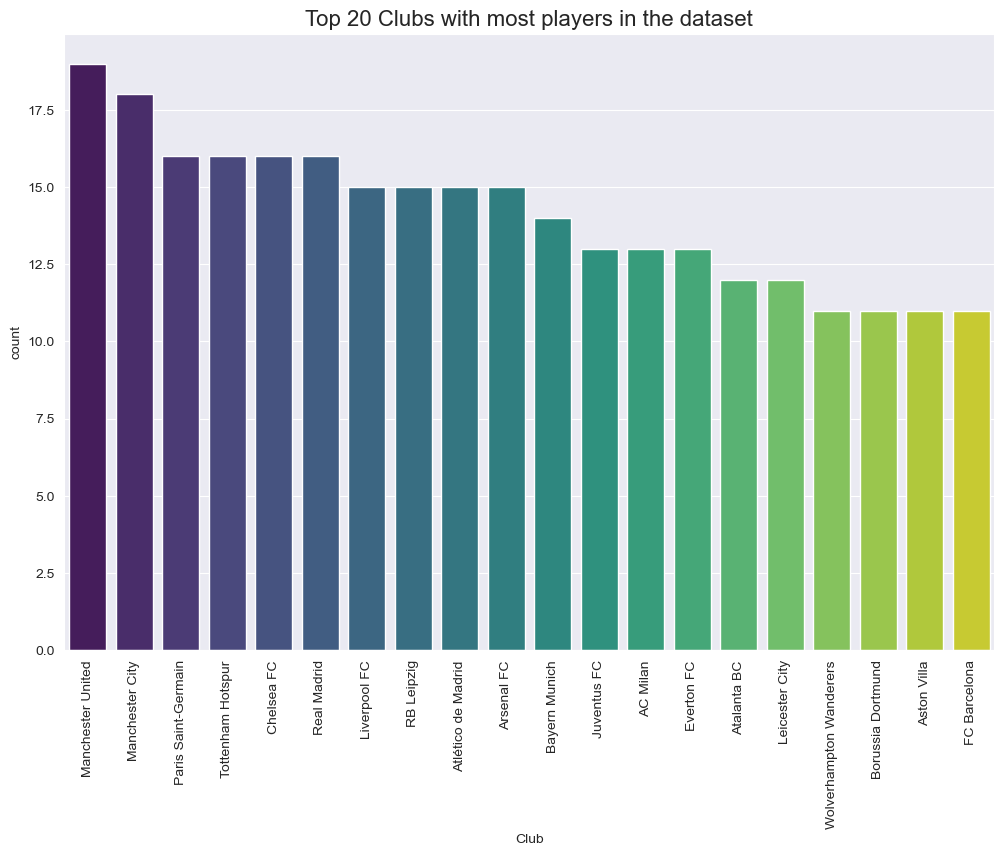

In [52]:
# visualizing

plt.figure(figsize=(12, 8))

plt.title("Top 20 Clubs with most players in the dataset", fontsize=16)

sns.countplot(data=data, x='Club', order=top_20_clubs.index, palette='viridis')

plt.xticks(rotation=90)

plt.show()

In [53]:
data.groupby('Club').Market_value.sum().sort_values(ascending = False).nlargest(20)

Club
Manchester City        937
Paris Saint-Germain    772
Manchester United      754
Chelsea FC             704
Bayern Munich          683
Liverpool FC           677
Atlético de Madrid     615
Real Madrid            590
Tottenham Hotspur      530
FC Barcelona           448
Juventus FC            447
Borussia Dortmund      422
Arsenal FC             403
Leicester City         385
RB Leipzig             375
Inter Milan            373
AC Milan               354
SSC Napoli             351
Everton FC             316
Aston Villa            284
Name: Market_value, dtype: int32

In [54]:
top_20_clubs_value = data.groupby('Club').Market_value.mean().sort_values(ascending = False).nlargest(20)
top_20_clubs_value 

Club
Manchester City        52.055556
Bayern Munich          48.785714
Paris Saint-Germain    48.250000
Inter Milan            46.625000
Liverpool FC           45.133333
Chelsea FC             44.000000
Atlético de Madrid     41.000000
FC Barcelona           40.727273
Manchester United      39.684211
Borussia Dortmund      38.363636
Real Madrid            36.875000
SSC Napoli             35.100000
Juventus FC            34.384615
Sevilla FC             33.666667
Tottenham Hotspur      33.125000
SS Lazio               33.000000
Bayer 04 Leverkusen    32.500000
Leicester City         32.083333
West Ham United        31.714286
Torino FC              31.000000
Name: Market_value, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


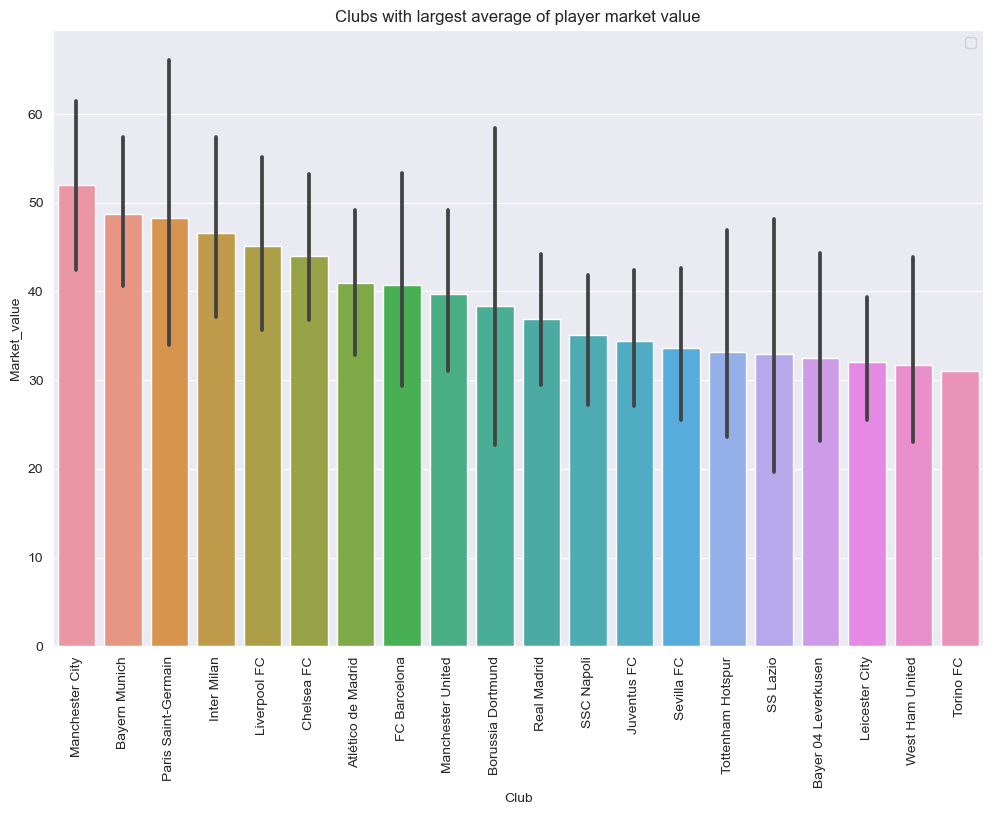

In [55]:
# visualizing

plt.figure(figsize=(12,8))

plt.title("Clubs with largest average of player market value")

sns.barplot(data=data, x='Club', y='Market_value', order=top_20_clubs_value.index)

sns.set_style("dark")

plt.xticks(rotation=90)

plt.legend()

#### Insights

##### Portuguese

- Conforme vimos, temos múltiplos clubes no dataset. Os que possuem a maior quantidade de jogadores são os seguintes: Manchester United (19 jogadores), Manchester City (18 jogadores), Paris Saint-Germain (16 jogadores), Tottenham Hotspur (16 jogadores), Chelsea FC (16 jogadores) e Real Madrid (16 jogadores). 

- O Manchester City lidera na soma de valor de mercado, seguido do Paris Saint-Germain, Manchester United, Chelsea FC e Bayern Munich. 

- Quando observamos a média de valor de mercado por clube, notamos que o Manchester City, Bayern de Munique, Paris Saint-Germain, Inter de Milão e Liverpool possuem os maiores valores, o que indica o quão valiosos são os jogadores dessas equipes.










##### English

- As we have seen, there are multiple clubs in the dataset. The ones with the highest number of players are as follows: Manchester United (19 players), Manchester City (18 players), Paris Saint-Germain (16 players), Tottenham Hotspur (16 players), Chelsea FC (16 players), and Real Madrid (16 players).

- Manchester City leads in the total market value sum, followed by Paris Saint-Germain, Manchester United, Chelsea FC, and Bayern Munich.

- When we observe the average market value per club, we notice that Manchester City, Bayern Munich, Paris Saint-Germain, Inter Milan, and Liverpool have the highest values, indicating how valuable the players of these teams are.

### 3.5 Players

In [56]:
data.Name.unique()

array(['Kylian Mbappé', 'Erling Haaland', 'Harry Kane', 'Jack Grealish',
       'Mohamed Salah', 'Romelu Lukaku', 'Kevin De Bruyne', 'Neymar',
       'Jadon Sancho', 'Frenkie de Jong', 'Bruno Fernandes',
       'Joshua Kimmich', 'Raheem Sterling', 'Marcus Rashford',
       'Sadio Mané', 'Heung-min Son', 'Pedri', 'Phil Foden',
       'Lautaro Martínez', 'Marcos Llorente', 'Lionel Messi',
       'Mason Mount', 'Trent Alexander-Arnold', 'Rúben Dias',
       'Marquinhos', 'Jude Bellingham', 'João Félix', 'Alphonso Davies',
       'Achraf Hakimi', 'Declan Rice', 'Rodri', 'Mikel Oyarzabal',
       'Federico Chiesa', 'Matthijs de Ligt', 'Kai Havertz',
       'Sergej Milinković-Savić', 'Bernardo Silva', 'Raphaël Varane',
       'Serge Gnabry', 'Leon Goretzka', 'Jan Oblak', 'Casemiro',
       'Florian Wirtz', 'Bukayo Saka', 'Federico Valverde',
       'Gianluigi Donnarumma', 'Nicolò Barella', 'Andrew Robertson',
       'Ansu Fati', 'Jules Koundé', 'Victor Osimhen', 'Gabriel Jesus',
       'Dayo

In [57]:
# analyzing the top 10 players

top_10 = data.sort_values(ascending = False, by='Market_value').head(10)
top_10

,Name,Position,Age,Market_value,Country,Club,Matches,Goals,Own_goals,Assists,Yellow_cards,Second_yellow_cards,Red_cards,Substitute_in,Substitute_out,New_Position,Goals.per.game,Assists.per.game
0,Kylian Mbappé,Centre-Forward,22,144,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8,Attacker,0.44,0.69
1,Erling Haaland,Centre-Forward,21,135,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1,Attacker,1.30,0.40
2,Harry Kane,Centre-Forward,28,108,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2,Attacker,0.44,0.12
4,Mohamed Salah,Right Winger,29,90,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3,Attacker,1.00,0.40
5,Romelu Lukaku,Centre-Forward,28,90,Belgium,Chelsea FC,11,4,0,1,0,0,0,1,2,Attacker,0.36,0.09
6,Kevin De Bruyne,Attacking Midfield,30,90,Belgium,Manchester City,14,3,0,1,1,0,0,4,6,Midfielder,0.21,0.07
7,Neymar,Left Winger,29,90,Brazil,Paris Saint-Germain,11,3,0,3,3,0,0,0,3,Attacker,0.27,0.27
3,Jack Grealish,Left Winger,26,90,England,Manchester City,15,2,0,3,1,0,0,2,8,Attacker,0.13,0.20
8,Jadon Sancho,Left Winger,21,81,England,Manchester United,13,0,0,0,0,0,0,7,5,Attacker,0.00,0.00
9,Frenkie de Jong,Central Midfield,24,81,Netherlands,FC Barcelona,13,0,0,2,2,1,0,0,2,Midfielder,0.00,0.15


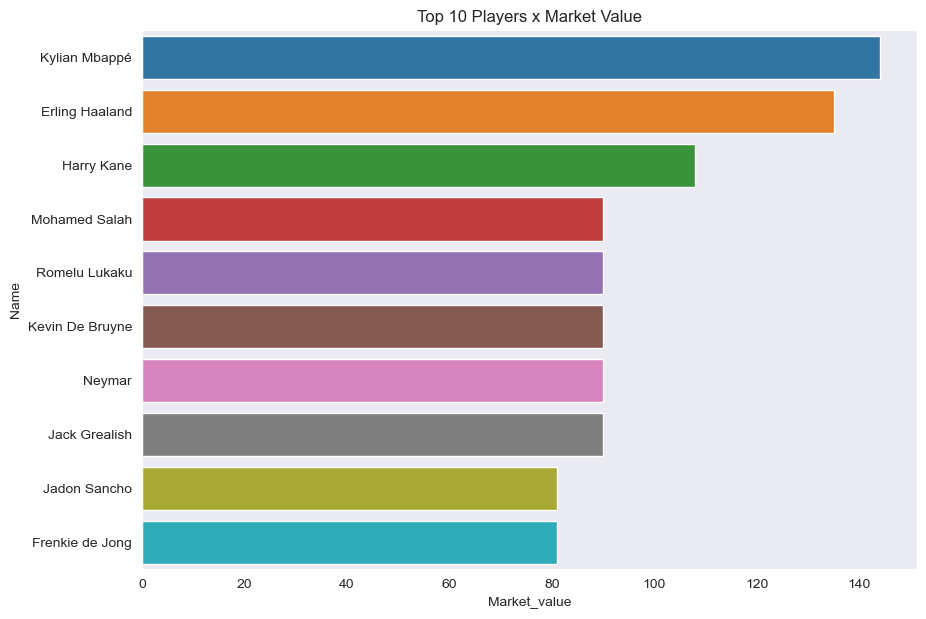

In [58]:
#visualizing

plt.figure(figsize=(10,7))

plt.title("Top 10 Players x Market Value")

sns.barplot(data=top_10, y="Name", x="Market_value")

sns.set_style("darkgrid")

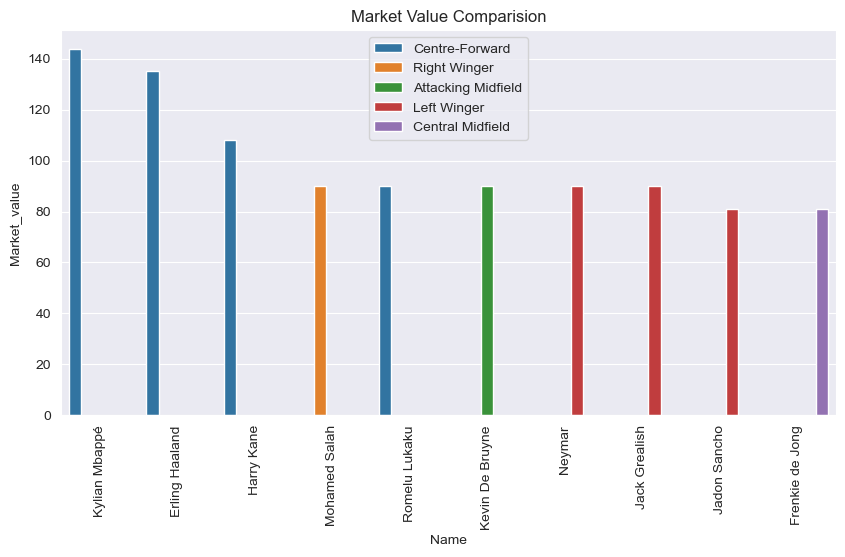

In [81]:
# visualizing

plt.figure(figsize=(10,5))

plt.title("Market Value Comparision")

sns.barplot(x='Name', y='Market_value', hue='Position', data=top_10)

plt.xticks(rotation=90)

plt.legend()

<Axes: title={'center': 'Players x Position x Market Value'}, xlabel='Name', ylabel='Market_value'>

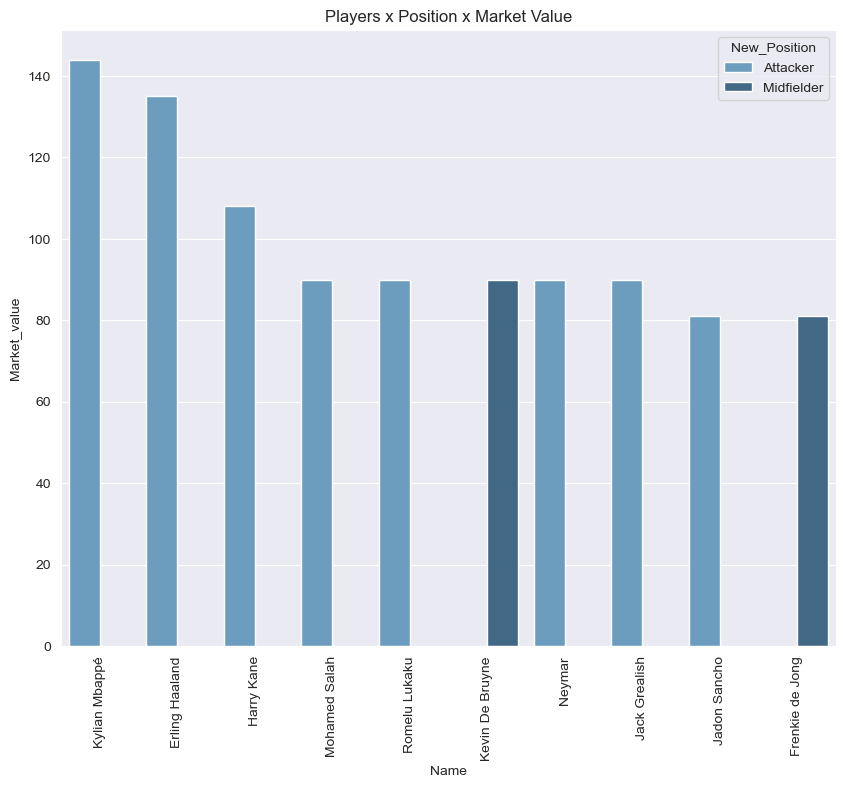

In [60]:
plt.figure(figsize=(10,8))

plt.title("Players x Position x Market Value")

plt.xticks(rotation=90)

sns.set_style("dark")

sns.barplot(x='Name', y='Market_value', hue='New_Position', data=top_10, palette='Blues_d')

In [61]:
data.groupby(['Name', 'Club']).Market_value.sum().sort_values(ascending = False).nlargest(10)

Name             Club               
Kylian Mbappé    Paris Saint-Germain    144
Erling Haaland   Borussia Dortmund      135
Harry Kane       Tottenham Hotspur      108
Neymar           Paris Saint-Germain     90
Mohamed Salah    Liverpool FC            90
Kevin De Bruyne  Manchester City         90
Romelu Lukaku    Chelsea FC              90
Jack Grealish    Manchester City         90
Bruno Fernandes  Manchester United       81
Raheem Sterling  Manchester City         81
Name: Market_value, dtype: int32

<Axes: title={'center': 'Players x Position x Market Value'}, xlabel='Name', ylabel='Market_value'>

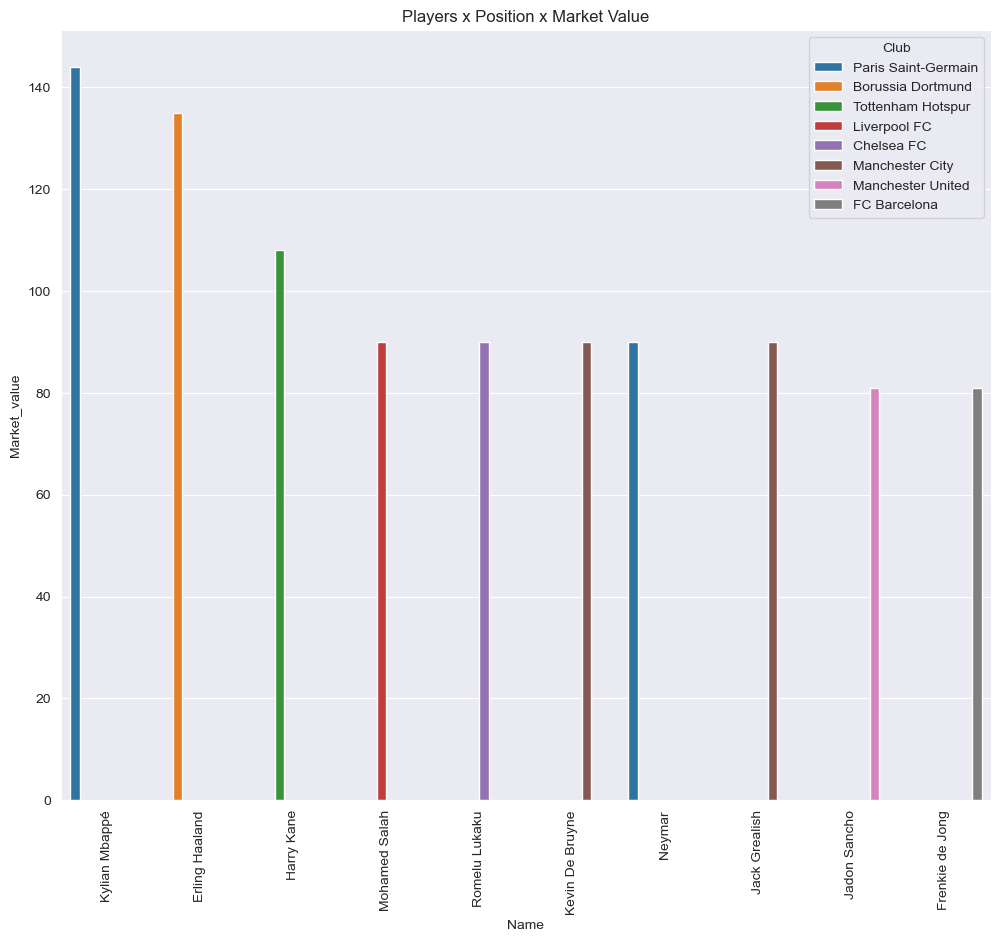

In [82]:
# visualizing

plt.figure(figsize=(12,10))

plt.title("Players x Position x Market Value")

plt.xticks(rotation=90)

sns.set_style("dark")

sns.barplot(x='Name', y='Market_value', hue='Club', data=top_10)

#### Insights

##### Portuguese

- Analisei os 10 jogadores com maior valor de mercado do dataset. Como podemos observar, Kylian Mbappé, Erling Haaland, Harry Kane, Mohamed Salah e Lukaku lideram a lista. 

- Dentre esses 10 jogadores, 8 são atacantes, enquanto 2 são meiocampistas. Além disso, temos 4 Centre-Forwards, 3 Left-Wingers, 1 Right-Winger, 1 Attacking Midfield e 1 Center-Midfielder. 

- Analisando por clube, temos dois jogadores do Manchester City e dois do Paris Saint-Germain entre os 10 mais valorizados. Os outros clubes presentes no top 10 possuem um jogador. Os clubes são os seguintes: Borussia Dortmund, Tottenham Hotspur, Liverpool FC, Chelsea FC, Manchester United e FC Barcelona. 





##### English

- I analyzed the top 10 players with the highest market value in the dataset. As we can see, Kylian Mbappé, Erling Haaland, Harry Kane, Mohamed Salah, and Lukaku are leading the list.

- Among these 10 players, 8 are forwards, while 2 are midfielders. Additionally, we have 4 Centre-Forwards, 3 Left-Wingers, 1 Right-Winger, 1 Attacking Midfield, and 1 Center-Midfielder. 

- Analyzing by club, we have two players from Manchester City and two from Paris Saint-Germain among the top 10 most valued players. The other clubs have one player each. The clubs are as follows: Borussia Dortmund, Tottenham Hotspur, Liverpool FC, Chelsea FC, Manchester United, and FC Barcelona.

## Mbappé x Haaland

<img src="mbappeXhaaland.jpg" alt="Football Players Market Value Analysis" width="700">


##### Lets analyze and compare the two most valuable players in the world.

In [63]:
top_2 = data[data['Name'].isin(['Erling Haaland', 'Kylian Mbappé'])]
top_2

,Name,Position,Age,Market_value,Country,Club,Matches,Goals,Own_goals,Assists,Yellow_cards,Second_yellow_cards,Red_cards,Substitute_in,Substitute_out,New_Position,Goals.per.game,Assists.per.game
0,Kylian Mbappé,Centre-Forward,22,144,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8,Attacker,0.44,0.69
1,Erling Haaland,Centre-Forward,21,135,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1,Attacker,1.30,0.40


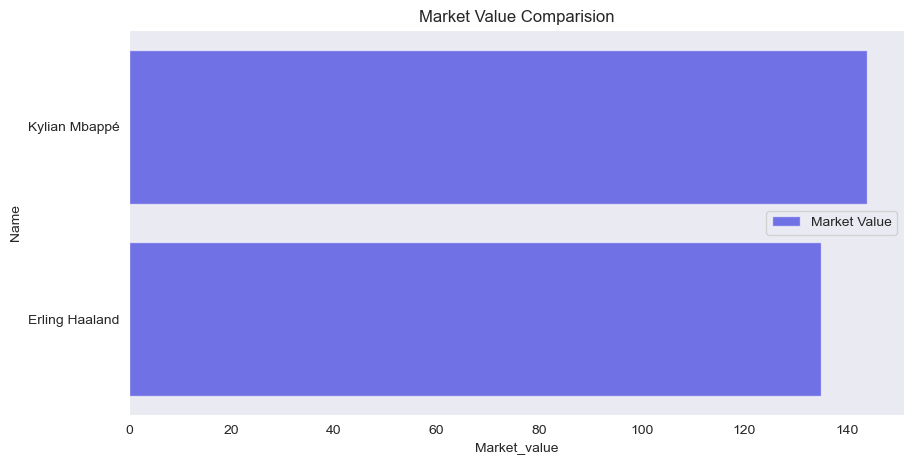

In [64]:
# visualizing

plt.figure(figsize=(10,5))

plt.title("Market Value Comparision")

sns.set_style("darkgrid")

sns.barplot(y='Name', x='Market_value', data=top_2, color='blue', alpha=0.6, label='Market Value')

plt.legend()

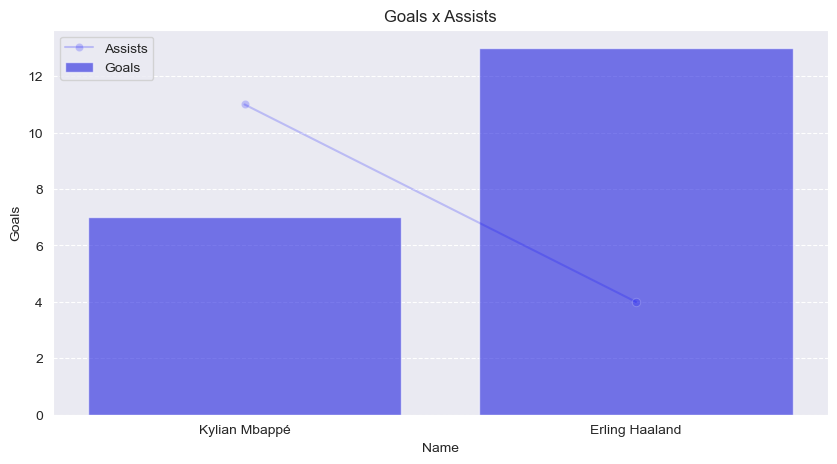

In [65]:
# visualizing

plt.figure(figsize=(10,5))

plt.title("Goals x Assists")

sns.barplot(x='Name', y='Goals', data=top_2, color='blue', alpha=0.6, label='Goals')

sns.lineplot(data=top_2['Assists'], color='blue', alpha=0.2, marker='o', label='Assists')

plt.grid(True, axis='y', linestyle='--', alpha=1.0)

sns.set_style("dark")

plt.legend()

plt.show()

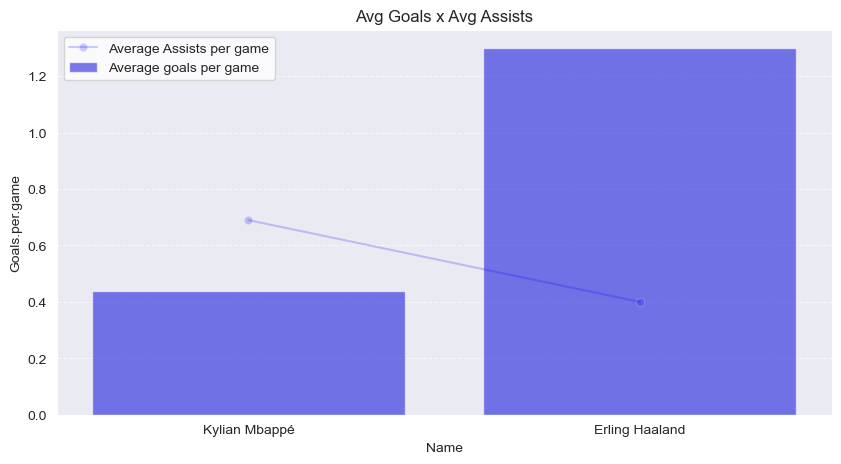

In [66]:
# visualizing

plt.figure(figsize=(10,5))

plt.title("Avg Goals x Avg Assists")

sns.barplot(x='Name', y='Goals.per.game', data=top_2, color='blue', alpha=0.6, label='Average goals per game')

sns.lineplot(data=top_2['Assists.per.game'], color='blue', alpha=0.2, marker='o', label='Average Assists per game')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

sns.set_style("white")

plt.legend()

plt.show()

#### Insights

##### Portuguese

- Percebemos que Kylian Mbappé está na frente de Erling Haaland em relação a valor de mercado. 

- Quando comparamos gols e assistências, percebemos duas dinâmicas opostas: Mbappé apresentou maior número de assistências. Por outro lado, Haaland teve maior número de gols no ano. Essa mesma tendência se repetiu para média de gols por partida e média de assistências por partida.

##### English

- We noticed that Kylian Mbappé is ahead of Erling Haaland in terms of market value.
- When comparing goals and assists, we observed two opposite dynamics: Mbappé had more assists, while Haaland scored more goals. This same trend repeated for the average goals per match and average assists per match.